In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [2]:
df = pd.read_pickle('Data/clean_seattle_ngram_df')

In [3]:
df.head()

,listed_items
0,develop high scalabl classifi tool leverag mac...
1,play pivot role modern standard enhanc peoples...
2,act contribut ux design high visibl fortun 100...
3,manag 6 8 technic product manag respons day da...
4,lead grow appli scientist solv problem zillow ...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

### TF-IDF - KMeans

In [5]:
tf_idf = TfidfVectorizer(max_df=0.95)
tf_idf_array = tf_idf.fit_transform(df.listed_items).toarray()
tf_idf_df = pd.DataFrame(tf_idf_array,columns=tf_idf.get_feature_names())
tf_idf_df.shape

(2908, 10016)

In [6]:
tf_idf_df.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
inertia = []
i = 2
while i <= 10:
    num_clusters = i
    km = KMeans(n_clusters=num_clusters,n_jobs=-1,verbose=3)
    km.fit(tf_idf_df.values)
    inertia.append(km.inertia_)
    i += 1

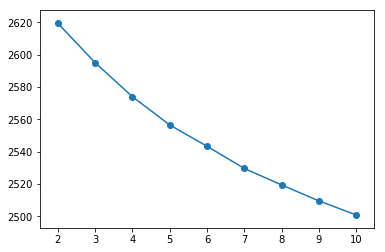

In [15]:
plt.plot(range(2,11,1),inertia)
plt.scatter(range(2,11,1),inertia)

In [7]:
inertia = []
i = 2
while i <= 25:
    num_clusters = i
    km = KMeans(n_clusters=num_clusters,n_jobs=6,n_init=5)
    km.fit(tf_idf_df.values)
    inertia.append(km.inertia_)
    i += 1

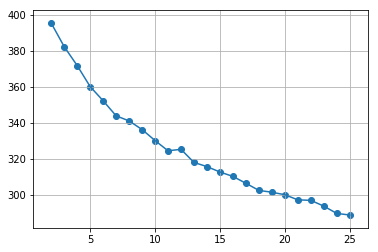

In [16]:
plt.grid()
plt.plot(range(2,26,1),inertia)
plt.scatter(range(2,26,1),inertia)

### Word2vec

In [9]:
df = pd.read_pickle('Data/clean_seattle_word2vec')

In [10]:
inertia = []
i = 2
while i <= 25:
    num_clusters = i
    km = KMeans(n_clusters=num_clusters,n_jobs=6,n_init=5)
    km.fit(df.values)
    inertia.append(km.inertia_)
    i += 1

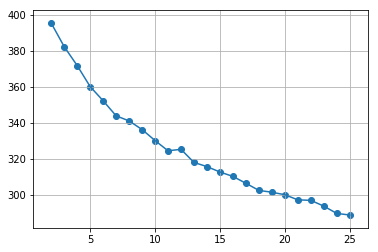

In [15]:
plt.grid()
plt.plot(range(2,26,1),inertia)
plt.scatter(range(2,26,1),inertia)